In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/Users/gordon/opt/anaconda3/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/gordon/opt/anaconda3/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
!pip3 install emoji

     |████████████████████████████████| 216 kB 8.4 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=768c800e0c8980d5bb7b01a88bd0f3fc688cd3bf8b02de9a722c6faeaaef08ae
  Stored in directory: /Users/gordon/Library/Caches/pip/wheels/b0/4a/c8/9c580a0ea94dea641b8023456a1b178a7e4509d992224ed4aa
Successfully built emoji


1. Import Libraries

In [ ]:
#Import Libraries 
import pandas as pd
import snscrape
import snscrape.modules.twitter as sntwitter
import re
import emoji

In [ ]:
emoji.is_emoji("😘")

emoji.emoji_count("hello 😘")

1

In [ ]:
#Check fields 
query3 = "(from:POTUS) since:2022-08-08"
tweets = []
limit = 1


for tweet in sntwitter.TwitterSearchScraper(query3).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append(tweet)
        
print(tweets)

[Tweet(url='https://twitter.com/POTUS/status/1579970107131842560', date=datetime.datetime(2022, 10, 11, 23, 0, 2, tzinfo=datetime.timezone.utc), rawContent="Today, I commemorated Fire Prevention Week and thanked our nation's firefighters on behalf of my family and every American.\n\nWhen the worst happens and those you love are in danger, there is no better sight in the world than a firefighter who is ready to go to work. https://t.co/VYjWAQQKWK", renderedContent="Today, I commemorated Fire Prevention Week and thanked our nation's firefighters on behalf of my family and every American.\n\nWhen the worst happens and those you love are in danger, there is no better sight in the world than a firefighter who is ready to go to work. https://t.co/VYjWAQQKWK", id=1579970107131842560, user=User(username='POTUS', id=1349149096909668363, displayname='President Biden', rawDescription='46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: https://t.co/HD

In [ ]:
for property, value in vars(tweets[0]).items():
    print(property, ":", value)


url : https://twitter.com/POTUS/status/1579970107131842560
date : 2022-10-11 23:00:02+00:00
rawContent : Today, I commemorated Fire Prevention Week and thanked our nation's firefighters on behalf of my family and every American.

When the worst happens and those you love are in danger, there is no better sight in the world than a firefighter who is ready to go to work. https://t.co/VYjWAQQKWK
renderedContent : Today, I commemorated Fire Prevention Week and thanked our nation's firefighters on behalf of my family and every American.

When the worst happens and those you love are in danger, there is no better sight in the world than a firefighter who is ready to go to work. https://t.co/VYjWAQQKWK
id : 1579970107131842560
user : https://twitter.com/POTUS
replyCount : 900
retweetCount : 725
likeCount : 3430
quoteCount : 49
conversationId : 1579970107131842560
lang : en
source : <a href="https://www.sprinklr.com" rel="nofollow">The White House</a>
sourceUrl : https://www.sprinklr.com
sourc

FIELDS

url, date, rawContent, renderedContent, id, user, replyCount, retweetCount, likeCount, quoteCount, conversationId, lang, source, sourceUrl, links, media, retweetedTweet, quotedTweet, inReplyToTweetId, inReplyToUser, mentionedUsers, coordinates, place, hashtags, cashtags, card

Fields that we need possibly: 

date, rawContent, id, user, replyCount, retweetCount, likeCount, quoteCount, conversationId, retweetedTweet, quotedTweet, inReplyToTweetId, inReplyToUser, mentionedUsers

In [ ]:
dem_df.dtypes

Date                datetime64[ns, UTC]
Content                          object
Id                                int64
Username                         object
replyCount                        int64
retweetCount                      int64
likeCount                         int64
quoteCount                        int64
conversationId                    int64
retweetedTweet                   object
quotedTweet                      object
inReplyToTweetId                float64
inReplyToUser                    object
mentionedUsers                   object
dtype: object

2. Gathering tweets and creating dataframe

In [ ]:
#Sample queries 
# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# query1 = "Pennsylvania"
# query2 = '#biden min_faves:50 min_replies:10'
# query3 = "(from:POTUS) since:2022-08-08"

#Democrats 
query4 = "#johnfetterman until:2022-10-11 since:2022-08-11"
query5 = "#fetterman until:2022-10-11 since:2022-08-11"
query6 = "#VoteFetterman until:2022-10-11 since:2022-08-11"


limit = 5000
usernames = []
tweets =[]
otherTags = ["Senate", "Senator", "US", "Midterms", "Fetterman", "Oz", "Democrat", "Republican", "GOP", "stroke", "dog", "America", "vote"]

for tweet in sntwitter.TwitterSearchScraper(query4).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break

    
    else:
        if tweet.user not in usernames:
            if emoji.emoji_count(tweet.rawContent) ==0:
            #ensure at least one other tag is inside tweet, ensure tweet is within subject
                for tag in otherTags:
                    if tag in tweet.rawContent:
                        tweets.append([tweet.date, tweet.rawContent, tweet.id, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.conversationId, tweet.retweetedTweet, tweet.quotedTweet, tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers])
                        usernames.append(tweet.user)
                        break
        


In [ ]:

dem_df = pd.DataFrame(tweets, columns=['Date', 'Content', 'Id', 'Username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'])

In [ ]:
dem_df.drop_duplicates(keep='first', subset=['Content'], ignore_index=True)
len(dem_df)

1537

In [ ]:
#Sample queries 
# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# query1 = "Pennsylvania"
# query2 = '#biden min_faves:50 min_replies:10'
# query3 = "(from:POTUS) since:2022-08-08"

#Democrats 
query4 = "#johnfetterman until:2022-10-11 since:2022-08-11"
query5 = "#fetterman until:2022-10-11 since:2022-08-11"
query6 = "#VoteFetterman until:2022-10-11 since:2022-08-11"


limit = 5000
otherTags = ["Senate", "Senator", "US", "Midterms", "Fetterman", "Oz", "Democrat", "Republican", "GOP", "stroke", "dog", "America", "vote"]

for tweet in sntwitter.TwitterSearchScraper(query5).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break

    
    else:
         if tweet.user not in usernames:
            if emoji.emoji_count(tweet.rawContent) ==0:
            #ensure at least one other tag is inside tweet, ensure tweet is within subject
                for tag in otherTags:
                    if tag in tweet.rawContent:
                        tweets.append([tweet.date, tweet.rawContent, tweet.id, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.conversationId, tweet.retweetedTweet, tweet.quotedTweet, tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers])
                        usernames.append(tweet.user)
                        break

In [ ]:

df1 = pd.DataFrame(tweets, columns=['Date', 'Content', 'Id', 'Username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'])
df1_spare = df1.copy()


In [ ]:
dem_df = pd.concat([dem_df, df1_spare])
dem_df.drop_duplicates(keep='first', subset=['Content', 'Username'], ignore_index=True, inplace=True)
len(dem_df)

3984

In [ ]:
len(usernames)

3989

In [ ]:
dem_df['Content'][2]

"#DrOz says #JohnFetterman's health makes him a bad risk, therefore #Pennsylvanians should vote for him. Let's see...Dr. Oz who retains dual citizenship w/Turkey-who until recently wasn't even a resident of the state? Dead dogs &amp; rabbits:( Doc-smart people live in Pa. Say buh-bye"

In [ ]:
#Democrats 
query1= "#johnfetterman until:2022-10-11 since:2022-08-11"
query2 = "#fetterman until:2022-10-11 since:2022-08-11"
query3 = "#VoteFetterman until:2022-10-11 since:2022-08-11"

#Republicans
query4 = "#VoteOz until:2022-10-11 since:2022-08-11"
query5 = "#OZ until:2022-10-11 since:2022-08-11"
query6 = "#Pennsylvania #Oz until:2022-10-11 since:2022-08-11"
query7 = "#VoteOz until:2022-10-11 since:2022-08-11"
query10 = "#DrOz until:2022-10-11 since:2022-08-11"
query11 = "@DrOz until:2022-10-11 since:2022-08-11"

In [ ]:
#Sample queries 
# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# query1 = "Pennsylvania"
# query2 = '#biden min_faves:50 min_replies:10'
# query3 = "(from:POTUS) since:2022-08-08"

#Democrats 
query4 = "#johnfetterman until:2022-10-11 since:2022-09-11"
query5 = "#fetterman until:2022-10-11 since:2022-09-11"
query6 = "#VoteFetterman until:2022-10-11 since:2022-08-11"

#Republicans
query7 = "#VoteOz until:2022-10-11 since:2022-08-11"
query8 = "#OZ until:2022-10-11 since:2022-08-11"
query9 = "#Pennsylvania #Oz until:2022-10-11 since:2022-08-11"
query10 = "#VoteOz until:2022-10-11 since:2022-08-11"


tweets =[]
limit = 5000
otherTags = ["Senate", "Senator", "US", "Midterms", "Oz", "Democrat", "Republican", "GOP", "stroke", "dog", "America", "vote"]

for tweet in sntwitter.TwitterSearchScraper(query6).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break

    
    else:
        if tweet.user not in usernames:
            if emoji.emoji_count(tweet.rawContent) ==0:
            #ensure at least one other tag is inside tweet, ensure tweet is within subject
                for tag in otherTags:
                    if tag in tweet.rawContent:
                        tweets.append([tweet.date, tweet.rawContent, tweet.id, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.conversationId, tweet.retweetedTweet, tweet.quotedTweet, tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers])
                        usernames.append(tweet.user)
                        break

In [ ]:

df2 = pd.DataFrame(tweets, columns=['Date', 'Content', 'Id', 'Username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'])
df2_spare = df2.copy()
dem_df_spare = dem_df.copy()
dem_df_spare = pd.concat([dem_df_spare, df2_spare])
dem_df_spare.drop_duplicates(keep='first', subset=['Content'], ignore_index=True, inplace=True)
len(dem_df_spare)

8829

In [ ]:
#Remove emojis
demdf_with_emotes = dem_df_spare[dem_df_spare['Content'].str.contains(r'[\u263a-\U0001f645]')]

idx2=[]
index = demdf_with_emotes.index
for i in index: 
    idx2.append(i)

dem_df_spare = dem_df_spare.drop(idx2)

In [ ]:
len(dem_df_spare)

5288

In [ ]:
dem_df_spare.reset_index(drop=True, inplace=True)

In [ ]:
dem_df_spare

,Date,Content,Id,Username,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,2022-10-10 23:25:02+00:00,Note to #JohnFetterman \nThis Neck-Warmer-Hood...,1579614009661476867,AutoCarbine556,0,0,1,0,1579614009661476867,None,None,NaN,None,None
1,2022-10-10 23:01:21+00:00,#DrOz says #JohnFetterman's health makes him a...,1579608048079089669,robinstrasser,0,1,25,0,1579608048079089669,None,None,NaN,None,None
2,2022-10-10 21:15:50+00:00,"Hey, at this Fetterman-Oz debate, if they ask ...",1579581496188612608,rainbowbucs,1,0,1,0,1579581496188612608,None,None,NaN,None,None
3,2022-10-10 21:12:43+00:00,@NYMag @JohnFetterman @rtraister It's simple: ...,1579580713506336769,FischBytes,1,0,2,1,1579412390428364803,None,None,1.579413e+18,https://twitter.com/NYMag,"[https://twitter.com/NYMag, https://twitter.co..."
4,2022-10-10 20:09:10+00:00,#WARNING VIEWER DISCRETION IS ADVISED. VIDEO S...,1579564717202604032,sn00pdad,0,0,0,0,1579564717202604032,None,None,NaN,None,[https://twitter.com/MarkFusetti]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,2022-08-11 18:12:07+00:00,#VoteFetterman\n#FettermanForSenate,1557791988132577286,WhyKnotBC35,0,0,1,0,1557791988132577286,None,https://twitter.com/JohnFetterman/status/15571...,NaN,None,None
5284,2022-08-11 17:22:50+00:00,@DrOz You're a liar and a fraud and a charlata...,1557779588859789312,JaimeNewell17,0,0,0,0,1557452990591782915,None,None,1.557453e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]
5285,2022-08-11 16:31:40+00:00,Daily reminder time!! @DrOz is a fraud and a c...,1557766712967282688,mysterenygma,0,0,0,0,1557766712967282688,None,None,NaN,None,"[https://twitter.com/DrOz, https://twitter.com..."
5286,2022-08-11 01:27:27+00:00,@NellSco @DrOz What a dangerous sham… huckster...,1557539156368035840,trumanshow,0,0,1,0,1557452990591782915,None,None,1.557474e+18,https://twitter.com/NellSco,"[https://twitter.com/NellSco, https://twitter...."


In [ ]:
#Sample queries 
# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# query1 = "Pennsylvania"
# query2 = '#biden min_faves:50 min_replies:10'
# query3 = "(from:POTUS) since:2022-08-08"

#Republicans
query7 = "#VoteOz until:2022-10-11 since:2022-08-11"
query8 = "#OZ until:2022-10-11 since:2022-08-11"
query9 = "#Pennsylvania #Oz until:2022-10-11 since:2022-08-11"
query10 = "#VoteOz until:2022-10-11 since:2022-08-11"


limit = 5000
tweets =[]
otherTags = ["Senate", "Senator", "US", "Midterms", "Fetterman", "Democrat", "Republican", "Pennsylvania", "GOP", "stroke", "dog", "America", "vote"]

for tweet in sntwitter.TwitterSearchScraper(query7).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break

    
    else:
        if tweet.user not in usernames:
            if emoji.emoji_count(tweet.rawContent) ==0:
            #ensure at least one other tag is inside tweet, ensure tweet is within subject
                for tag in otherTags:
                    if tag in tweet.rawContent:
                        tweets.append([tweet.date, tweet.rawContent, tweet.id, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.conversationId, tweet.retweetedTweet, tweet.quotedTweet, tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers])
                        usernames.append(tweet.user)
                        break

In [ ]:
rep_df = pd.DataFrame(tweets, columns=['Date', 'Content', 'Id', 'Username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'])
rep_df.drop_duplicates(keep='first', subset=['Content'], ignore_index=True)
len(rep_df)

147

In [ ]:
len(usernames)

5672

In [ ]:
#Sample queries 
# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# query1 = "Pennsylvania"
# query2 = '#biden min_faves:50 min_replies:10'
# query3 = "(from:POTUS) since:2022-08-08"

#Republicans
query7 = "#VoteOz until:2022-10-11 since:2022-08-11"
query8 = "#OZ until:2022-10-11 since:2022-08-11"
query9 = "#Pennsylvania #Oz until:2022-10-11 since:2022-08-11"
query10 = "#VoteOz until:2022-10-11 since:2022-08-11"


limit = 5000
tweets =[]
otherTags = ["Senate", "Senator", "US", "Midterms", "Fetterman", "Democrat", "Republican", "GOP", "Pennsylvania","stroke", "dog", "America", "vote"]

for tweet in sntwitter.TwitterSearchScraper(query8).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break

    
    else:
        if tweet.user not in usernames:
            if emoji.emoji_count(tweet.rawContent) ==0:
            #ensure at least one other tag is inside tweet, ensure tweet is within subject
                for tag in otherTags:
                    if tag in tweet.rawContent:
                        tweets.append([tweet.date, tweet.rawContent, tweet.id, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.conversationId, tweet.retweetedTweet, tweet.quotedTweet, tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers])
                        usernames.append(tweet.user)
                        break

In [ ]:

df3 = pd.DataFrame(tweets, columns=['Date', 'Content', 'Id', 'Username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'])
df3_spare = df3.copy()
rep_df_spare = rep_df.copy()
rep_df_spare = pd.concat([rep_df_spare, df3_spare])
rep_df_spare.drop_duplicates(keep='first', subset=['Content'], ignore_index=True, inplace=True)
len(rep_df_spare)

595

In [ ]:
len(usernames)

6120

In [ ]:
rep_df_spare['Content'][1566]

'@JohnFetterman You can ask your parents for more money since they have to support you anyway.  Little wonder you are an advocate for Socialism. #Oz'

In [ ]:
#Sample queries 
# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# query1 = "Pennsylvania"
# query2 = '#biden min_faves:50 min_replies:10'
# query3 = "(from:POTUS) since:2022-08-08"

#Republicans
query7 = "#VoteOz until:2022-10-11 since:2022-08-11"
query8 = "#OZ until:2022-10-11 since:2022-08-11"
query9 = "#Pennsylvania #Oz until:2022-10-11 since:2022-08-11"
query10 = "#VoteOz until:2022-10-11 since:2022-08-11"


limit = 5000
tweets =[]
otherTags = ["Senate", "Senator", "US", "Midterms", "Fetterman", "Democrat", "Republican", "GOP", "Pennsylvania","stroke", "dog", "America", "vote"]

for tweet in sntwitter.TwitterSearchScraper(query9).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break

    
    else:
        if tweet.user not in usernames:
            if emoji.emoji_count(tweet.rawContent) ==0:
            #ensure at least one other tag is inside tweet, ensure tweet is within subject
                for tag in otherTags:
                    if tag in tweet.rawContent:
                        tweets.append([tweet.date, tweet.rawContent, tweet.id, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.conversationId, tweet.retweetedTweet, tweet.quotedTweet, tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers])
                        usernames.append(tweet.user)
                        break
        


In [ ]:
df4 = pd.DataFrame(tweets, columns=['Date', 'Content', 'Id', 'Username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'])
df4_spare = df4.copy()
rep_df_spare2 = rep_df_spare.copy()
rep_df_spare2 = pd.concat([rep_df_spare2, df4_spare])
rep_df_spare2.drop_duplicates(keep='first', subset=['Content'], ignore_index=True, inplace=True)
len(rep_df_spare2)

595

'@JohnFetterman You can ask your parents for more money since they have to support you anyway.  Little wonder you are an advocate for Socialism. #Oz'

In [ ]:
#Sample queries 
# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# query1 = "Pennsylvania"
# query2 = '#biden min_faves:50 min_replies:10'
# query3 = "(from:POTUS) since:2022-08-08"

#Republicans
query7 = "#VoteOz until:2022-10-11 since:2022-08-11"
query8 = "#OZ until:2022-10-11 since:2022-08-11"
query9 = "#Pennsylvania #Oz until:2022-10-11 since:2022-08-11"
query10 = "#DrOz until:2022-10-11 since:2022-08-11"


limit = 5000
tweets =[]
otherTags = ["Senate", "Senator", "US", "Midterms", "Fetterman", "Democrat", "Republican", "GOP", "Pennsylvania","stroke", "dog", "America", "vote"]

for tweet in sntwitter.TwitterSearchScraper(query10).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break

    
    else:
        if tweet.user not in usernames:
            if emoji.emoji_count(tweet.rawContent) ==0:
            #ensure at least one other tag is inside tweet, ensure tweet is within subject
                for tag in otherTags:
                    if tag in tweet.rawContent:
                        tweets.append([tweet.date, tweet.rawContent, tweet.id, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.conversationId, tweet.retweetedTweet, tweet.quotedTweet, tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers])
                        usernames.append(tweet.user)
                        break

In [ ]:
df4 = pd.DataFrame(tweets, columns=['Date', 'Content', 'Id', 'Username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'])
df4_spare = df4.copy()
rep_df_spare2 = rep_df_spare.copy()
rep_df_spare2 = pd.concat([rep_df_spare2, df4_spare])
rep_df_spare2.drop_duplicates(keep='first', subset=['Content'], ignore_index=True, inplace=True)
len(rep_df_spare2)

1890

In [ ]:
rep_df_spare2

,Date,Content,Id,Username,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,2022-10-10 23:54:52+00:00,@TheLadyArcher77 @NYMag @JohnFetterman @rtrais...,1579621519852212224,pastygincali,0,0,0,0,1579412390428364803,None,None,1.579489e+18,https://twitter.com/TheLadyArcher77,"[https://twitter.com/TheLadyArcher77, https://..."
1,2022-10-10 23:18:00+00:00,#voteoz this has to stop.,1579612240956731394,rebellynn83,1,0,0,0,1579612240956731394,None,https://twitter.com/PhillyCrimeUpd/status/1579...,NaN,None,None
2,2022-10-10 19:41:54+00:00,@rising_serpent Agreed Rising Serpent. #VoteO...,1579557855291936768,LisaBeast2,0,0,0,0,1579556657369341953,None,None,1.579557e+18,https://twitter.com/rising_serpent,[https://twitter.com/rising_serpent]
3,2022-10-10 02:14:45+00:00,@JohnFetterman #VoteOz https://t.co/EusIkctD0i,1579294333924446208,DelectoPeaches,0,0,0,0,1579101561745121281,None,None,1.579102e+18,https://twitter.com/JohnFetterman,[https://twitter.com/JohnFetterman]
4,2022-10-09 23:52:17+00:00,@LevineJonathan He has no business running for...,1579258481986924544,StephanieRuff3,0,0,2,0,1579253943577681920,None,None,1.579254e+18,https://twitter.com/LevineJonathan,[https://twitter.com/LevineJonathan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,2022-08-11 14:11:42+00:00,#HershelWalker is Not Winning the Georgia Sena...,1557731485456961538,PartesanJournal,0,0,0,0,1557731485456961538,None,None,NaN,None,[https://twitter.com/GOP]
1886,2022-08-11 13:10:20+00:00,So why is Mehmey standing up for BLM!? I thoug...,1557716044697030657,NJflaggers,1,1,2,0,1557716044697030657,None,https://twitter.com/DrOz/status/12711444164476...,NaN,None,None
1887,2022-08-11 11:34:29+00:00,#markmeuser #trump #Clinton #Obama #AOC #biden...,1557691922441031681,PistachioJoe3,0,0,0,0,1557691922441031681,None,https://twitter.com/MarkMeuser/status/15574153...,NaN,None,None
1888,2022-08-11 08:55:08+00:00,This describes America succinctly.\n\nThe GOP ...,1557651819928719362,TestWithScience,0,0,0,0,1557651819928719362,None,https://twitter.com/lindyli/status/15550112920...,NaN,None,None


In [ ]:
len(usernames)

7423

In [ ]:
#Sample queries 
# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# query1 = "Pennsylvania"
# query2 = '#biden min_faves:50 min_replies:10'
# query3 = "(from:POTUS) since:2022-08-08"

#Republicans
query7 = "#VoteOz until:2022-10-11 since:2022-08-11"
query8 = "#OZ until:2022-10-11 since:2022-08-11"
query9 = "#Pennsylvania #Oz until:2022-10-11 since:2022-08-11"
query10 = "#DrOz until:2022-10-11 since:2022-08-11"
query11 = "@DrOz until:2022-10-11 since:2022-08-11"

limit = 5000
tweets =[]
otherTags = ["Senate", "Senator", "US", "Midterms", "Fetterman", "Democrat", "Republican", "GOP", "Pennsylvania","stroke", "dog", "America", "vote"]

for tweet in sntwitter.TwitterSearchScraper(query11).get_items():

    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break

    
    else:
         if tweet.user not in usernames:
            if emoji.emoji_count(tweet.rawContent) ==0:
            #ensure at least one other tag is inside tweet, ensure tweet is within subject
                for tag in otherTags:
                    if tag in tweet.rawContent:
                        tweets.append([tweet.date, tweet.rawContent, tweet.id, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.conversationId, tweet.retweetedTweet, tweet.quotedTweet, tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers])
                        usernames.append(tweet.user)
                        break
        


In [ ]:
df5 = pd.DataFrame(tweets, columns=['Date', 'Content', 'Id', 'Username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'])
df5_spare = df5.copy()
rep_df_spare3 = rep_df_spare2.copy()
rep_df_spare3 = pd.concat([rep_df_spare3, df5_spare])
rep_df_spare3.drop_duplicates(keep='first', subset=['Content'], ignore_index=True, inplace=True)
len(rep_df_spare3)

6850

In [ ]:
rep_df_spare3

,Date,Content,Id,Username,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,2022-10-10 23:54:52+00:00,@TheLadyArcher77 @NYMag @JohnFetterman @rtrais...,1579621519852212224,pastygincali,0,0,0,0,1579412390428364803,None,None,1.579489e+18,https://twitter.com/TheLadyArcher77,"[https://twitter.com/TheLadyArcher77, https://..."
1,2022-10-10 23:18:00+00:00,#voteoz this has to stop.,1579612240956731394,rebellynn83,1,0,0,0,1579612240956731394,None,https://twitter.com/PhillyCrimeUpd/status/1579...,NaN,None,None
2,2022-10-10 19:41:54+00:00,@rising_serpent Agreed Rising Serpent. #VoteO...,1579557855291936768,LisaBeast2,0,0,0,0,1579556657369341953,None,None,1.579557e+18,https://twitter.com/rising_serpent,[https://twitter.com/rising_serpent]
3,2022-10-10 02:14:45+00:00,@JohnFetterman #VoteOz https://t.co/EusIkctD0i,1579294333924446208,DelectoPeaches,0,0,0,0,1579101561745121281,None,None,1.579102e+18,https://twitter.com/JohnFetterman,[https://twitter.com/JohnFetterman]
4,2022-10-09 23:52:17+00:00,@LevineJonathan He has no business running for...,1579258481986924544,StephanieRuff3,0,0,2,0,1579253943577681920,None,None,1.579254e+18,https://twitter.com/LevineJonathan,[https://twitter.com/LevineJonathan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,2022-10-07 14:24:22+00:00,@DarrenKaplan Well at least he treat dogs bett...,1578390782616240132,Tbukey,1,0,1,0,1578389536358518784,None,None,1.578390e+18,https://twitter.com/DarrenKaplan,"[https://twitter.com/DarrenKaplan, https://twi..."
6846,2022-10-07 14:24:09+00:00,Incredible. Not only did John Fetterman live o...,1578390729579266049,TomCottonAR,82,183,617,9,1578390729579266049,None,https://twitter.com/AP/status/1577964658048307202,NaN,None,[https://twitter.com/DrOz]
6847,2022-10-07 14:22:36+00:00,@IMurtazashvili @Bonneau_Says @ConorLambPA @Jo...,1578390340335243272,prisonrodeo,1,0,1,0,1578021254975524864,None,None,1.578047e+18,https://twitter.com/IMurtazashvili,"[https://twitter.com/IMurtazashvili, https://t..."
6848,2022-10-07 14:22:09+00:00,"@DrOz Woof, woof! You dog killer.\n#DogsForFet...",1578390223863664642,Flag19591,0,0,0,0,1578015098920124418,None,None,1.578015e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]


In [ ]:
rep_df_spare4 = rep_df_spare3.copy()
repdf_with_emotes = rep_df_spare4[rep_df_spare4['Content'].str.contains(r'[\u263a-\U0001f645]')]
len(repdf_with_emotes)
idx=[]
index = repdf_with_emotes.index
for i in index: 
    idx.append(i)

rep_df_spare5= rep_df_spare4.copy()
rep_df_spare5 = rep_df_spare5.drop(idx)


In [ ]:
rep_df_spare5

,Date,Content,Id,Username,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,2022-10-10 23:54:52+00:00,@TheLadyArcher77 @NYMag @JohnFetterman @rtrais...,1579621519852212224,pastygincali,0,0,0,0,1579412390428364803,None,None,1.579489e+18,https://twitter.com/TheLadyArcher77,"[https://twitter.com/TheLadyArcher77, https://..."
1,2022-10-10 23:18:00+00:00,#voteoz this has to stop.,1579612240956731394,rebellynn83,1,0,0,0,1579612240956731394,None,https://twitter.com/PhillyCrimeUpd/status/1579...,NaN,None,None
2,2022-10-10 19:41:54+00:00,@rising_serpent Agreed Rising Serpent. #VoteO...,1579557855291936768,LisaBeast2,0,0,0,0,1579556657369341953,None,None,1.579557e+18,https://twitter.com/rising_serpent,[https://twitter.com/rising_serpent]
3,2022-10-10 02:14:45+00:00,@JohnFetterman #VoteOz https://t.co/EusIkctD0i,1579294333924446208,DelectoPeaches,0,0,0,0,1579101561745121281,None,None,1.579102e+18,https://twitter.com/JohnFetterman,[https://twitter.com/JohnFetterman]
4,2022-10-09 23:52:17+00:00,@LevineJonathan He has no business running for...,1579258481986924544,StephanieRuff3,0,0,2,0,1579253943577681920,None,None,1.579254e+18,https://twitter.com/LevineJonathan,[https://twitter.com/LevineJonathan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,2022-10-07 14:24:22+00:00,@DarrenKaplan Well at least he treat dogs bett...,1578390782616240132,Tbukey,1,0,1,0,1578389536358518784,None,None,1.578390e+18,https://twitter.com/DarrenKaplan,"[https://twitter.com/DarrenKaplan, https://twi..."
6846,2022-10-07 14:24:09+00:00,Incredible. Not only did John Fetterman live o...,1578390729579266049,TomCottonAR,82,183,617,9,1578390729579266049,None,https://twitter.com/AP/status/1577964658048307202,NaN,None,[https://twitter.com/DrOz]
6847,2022-10-07 14:22:36+00:00,@IMurtazashvili @Bonneau_Says @ConorLambPA @Jo...,1578390340335243272,prisonrodeo,1,0,1,0,1578021254975524864,None,None,1.578047e+18,https://twitter.com/IMurtazashvili,"[https://twitter.com/IMurtazashvili, https://t..."
6848,2022-10-07 14:22:09+00:00,"@DrOz Woof, woof! You dog killer.\n#DogsForFet...",1578390223863664642,Flag19591,0,0,0,0,1578015098920124418,None,None,1.578015e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]


In [ ]:
rep_df_spare5.reset_index(drop=True, inplace=True)

In [ ]:
rep_df_spare5

,Date,Content,Id,Username,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,2022-10-10 23:54:52+00:00,@TheLadyArcher77 @NYMag @JohnFetterman @rtrais...,1579621519852212224,pastygincali,0,0,0,0,1579412390428364803,None,None,1.579489e+18,https://twitter.com/TheLadyArcher77,"[https://twitter.com/TheLadyArcher77, https://..."
1,2022-10-10 23:18:00+00:00,#voteoz this has to stop.,1579612240956731394,rebellynn83,1,0,0,0,1579612240956731394,None,https://twitter.com/PhillyCrimeUpd/status/1579...,NaN,None,None
2,2022-10-10 19:41:54+00:00,@rising_serpent Agreed Rising Serpent. #VoteO...,1579557855291936768,LisaBeast2,0,0,0,0,1579556657369341953,None,None,1.579557e+18,https://twitter.com/rising_serpent,[https://twitter.com/rising_serpent]
3,2022-10-10 02:14:45+00:00,@JohnFetterman #VoteOz https://t.co/EusIkctD0i,1579294333924446208,DelectoPeaches,0,0,0,0,1579101561745121281,None,None,1.579102e+18,https://twitter.com/JohnFetterman,[https://twitter.com/JohnFetterman]
4,2022-10-09 23:52:17+00:00,@LevineJonathan He has no business running for...,1579258481986924544,StephanieRuff3,0,0,2,0,1579253943577681920,None,None,1.579254e+18,https://twitter.com/LevineJonathan,[https://twitter.com/LevineJonathan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6832,2022-10-07 14:24:22+00:00,@DarrenKaplan Well at least he treat dogs bett...,1578390782616240132,Tbukey,1,0,1,0,1578389536358518784,None,None,1.578390e+18,https://twitter.com/DarrenKaplan,"[https://twitter.com/DarrenKaplan, https://twi..."
6833,2022-10-07 14:24:09+00:00,Incredible. Not only did John Fetterman live o...,1578390729579266049,TomCottonAR,82,183,617,9,1578390729579266049,None,https://twitter.com/AP/status/1577964658048307202,NaN,None,[https://twitter.com/DrOz]
6834,2022-10-07 14:22:36+00:00,@IMurtazashvili @Bonneau_Says @ConorLambPA @Jo...,1578390340335243272,prisonrodeo,1,0,1,0,1578021254975524864,None,None,1.578047e+18,https://twitter.com/IMurtazashvili,"[https://twitter.com/IMurtazashvili, https://t..."
6835,2022-10-07 14:22:09+00:00,"@DrOz Woof, woof! You dog killer.\n#DogsForFet...",1578390223863664642,Flag19591,0,0,0,0,1578015098920124418,None,None,1.578015e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]


In [ ]:
dem_df_spare2 = dem_df_spare.copy()
rep_df_spare6 = rep_df_spare5.copy()
dem_df_spare2 = dem_df_spare2.iloc[:5000]


In [ ]:
final_df = pd.concat([dem_df_spare2, rep_df_spare4])

In [ ]:
final_df.drop_duplicates(keep='first', subset=['Content'], ignore_index=True, inplace=True)

In [ ]:
final_df

,Date,Content,Id,Username,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,2022-10-10 23:25:02+00:00,Note to #JohnFetterman \nThis Neck-Warmer-Hood...,1579614009661476867,AutoCarbine556,0,0,1,0,1579614009661476867,None,None,NaN,None,None
1,2022-10-10 23:01:21+00:00,#DrOz says #JohnFetterman's health makes him a...,1579608048079089669,robinstrasser,0,1,25,0,1579608048079089669,None,None,NaN,None,None
2,2022-10-10 21:15:50+00:00,"Hey, at this Fetterman-Oz debate, if they ask ...",1579581496188612608,rainbowbucs,1,0,1,0,1579581496188612608,None,None,NaN,None,None
3,2022-10-10 21:12:43+00:00,@NYMag @JohnFetterman @rtraister It's simple: ...,1579580713506336769,FischBytes,1,0,2,1,1579412390428364803,None,None,1.579413e+18,https://twitter.com/NYMag,"[https://twitter.com/NYMag, https://twitter.co..."
4,2022-10-10 20:09:10+00:00,#WARNING VIEWER DISCRETION IS ADVISED. VIDEO S...,1579564717202604032,sn00pdad,0,0,0,0,1579564717202604032,None,None,NaN,None,[https://twitter.com/MarkFusetti]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11716,2022-10-07 14:24:22+00:00,@DarrenKaplan Well at least he treat dogs bett...,1578390782616240132,Tbukey,1,0,1,0,1578389536358518784,None,None,1.578390e+18,https://twitter.com/DarrenKaplan,"[https://twitter.com/DarrenKaplan, https://twi..."
11717,2022-10-07 14:24:09+00:00,Incredible. Not only did John Fetterman live o...,1578390729579266049,TomCottonAR,82,183,617,9,1578390729579266049,None,https://twitter.com/AP/status/1577964658048307202,NaN,None,[https://twitter.com/DrOz]
11718,2022-10-07 14:22:36+00:00,@IMurtazashvili @Bonneau_Says @ConorLambPA @Jo...,1578390340335243272,prisonrodeo,1,0,1,0,1578021254975524864,None,None,1.578047e+18,https://twitter.com/IMurtazashvili,"[https://twitter.com/IMurtazashvili, https://t..."
11719,2022-10-07 14:22:09+00:00,"@DrOz Woof, woof! You dog killer.\n#DogsForFet...",1578390223863664642,Flag19591,0,0,0,0,1578015098920124418,None,None,1.578015e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]


In [ ]:
final_df2 = final_df.iloc[:10000]

In [ ]:
final_df2

,Date,Content,Id,Username,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,2022-10-10 23:25:02+00:00,Note to #JohnFetterman \nThis Neck-Warmer-Hood...,1579614009661476867,AutoCarbine556,0,0,1,0,1579614009661476867,None,None,NaN,None,None
1,2022-10-10 23:01:21+00:00,#DrOz says #JohnFetterman's health makes him a...,1579608048079089669,robinstrasser,0,1,25,0,1579608048079089669,None,None,NaN,None,None
2,2022-10-10 21:15:50+00:00,"Hey, at this Fetterman-Oz debate, if they ask ...",1579581496188612608,rainbowbucs,1,0,1,0,1579581496188612608,None,None,NaN,None,None
3,2022-10-10 21:12:43+00:00,@NYMag @JohnFetterman @rtraister It's simple: ...,1579580713506336769,FischBytes,1,0,2,1,1579412390428364803,None,None,1.579413e+18,https://twitter.com/NYMag,"[https://twitter.com/NYMag, https://twitter.co..."
4,2022-10-10 20:09:10+00:00,#WARNING VIEWER DISCRETION IS ADVISED. VIDEO S...,1579564717202604032,sn00pdad,0,0,0,0,1579564717202604032,None,None,NaN,None,[https://twitter.com/MarkFusetti]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-10-08 23:36:15+00:00,@DrOz It always gets me when the right say far...,1578892056314859523,Helens31Self,0,0,0,0,1578774229440679936,None,None,1.578774e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]
9996,2022-10-08 23:36:05+00:00,@DrOz Dog Killer is reaching here. #GOPCesspoo...,1578892016842600449,TheNutcracker20,0,0,0,0,1578867079008071680,None,None,1.578867e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]
9997,2022-10-08 23:35:24+00:00,@DrOz Please post when/if Fetterman finally ha...,1578891844469288960,KarlyM2430,0,0,0,0,1577641000066945025,None,None,1.577641e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]
9998,2022-10-08 23:35:17+00:00,"@DrOz Of course we need change, we've got a wo...",1578891812101849089,Darkhosis666,0,1,1,0,1578774229440679936,None,None,1.578774e+18,https://twitter.com/DrOz,[https://twitter.com/DrOz]


In [ ]:
final_df2["Content"][7500]

'@DrOz John Fetterman knows cash bail hurt’s disadvantaged people! Turkish agents like you will always have the cash to make bail! Poor people aren’t all hardcore criminals! They shouldn’t be held because they don’t have the cash!'

In [ ]:
final_df2.loc[:, "Content"] = final_df2["Content"].apply(lambda x : x.replace('\n', '\\n'))
final_df2.to_csv("PennsylvaniaMidterms11Aug11Oct.csv", encoding="utf-8-sig", index=False)

In [ ]:
import pandas as pd
corpus = pd.read_csv("PennsylvaniaMidterms11Aug11Oct2.csv")



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = list(stopwords.words('english'))
stop.extend('https http co droz johnfetterman fetterman john oz pennsylvania pa like votefetterman would h6awrietyo gu7khdlyky gz7wlriu35 know could'.split())
vectorizer = TfidfVectorizer(stop_words=set(stop))
X = vectorizer.fit_transform(corpus['Content'])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


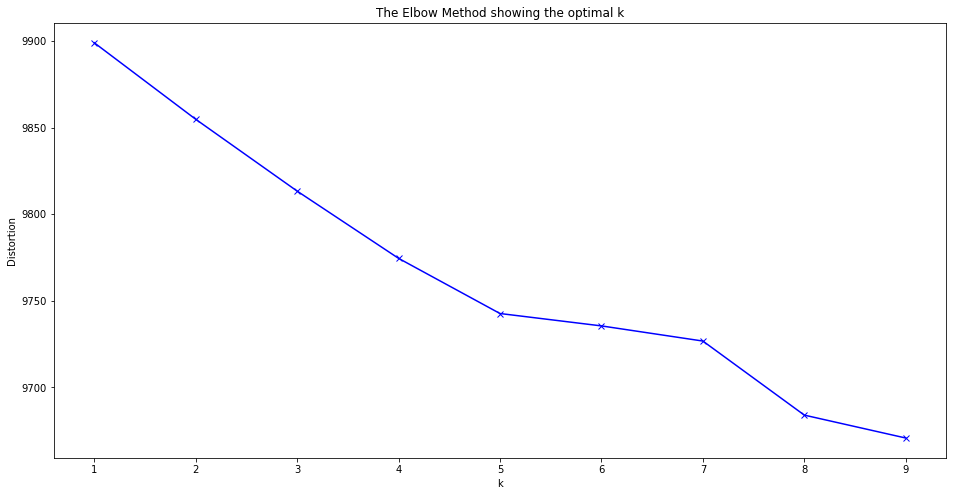

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    words = ""
    for ind in order_centroids[i, :10]:
        words = words + " " + terms[ind]
    print(words)

Top terms per cluster:
Cluster 0:
 fettermanforsenate fettermanisthebetterman dogs gop dr people man puppies better trump
Cluster 1:
 get one way people got vote need let dr go
Cluster 2:
 vote please anyone dr people guy blue turkey live fettermanisthebetterman
Cluster 3:
 senate amp us want senator crime people need candidate running
Cluster 4:
 jersey new dog killer back puppy go live dr turkey


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),


Top terms per cluster:
Cluster 0:
 senate
 gop
 dogs
 dr
 amp
 know
 man
 us
 trump
 crime
Cluster 1:
 fettermanisthebetterman
 fettermanforsenate
 fettermanpa
 vote
 pasen
 voteblue2022
 go
 fettermanforpa
 maga
 votebluetosavedemocracy
Cluster 2:
 think
 wants
 amp
 dr
 release
 people
 senate
 know
 one
 debate
Cluster 3:
 people
 vote
 amp
 know
 need
 want
 man
 get
 good
 senate
Cluster 4:
 dog
 killer
 puppy
 dr
 says
 vote
 murderer
 go
 dogs
 nazi
Cluster 5:
 jersey
 new
 back
 go
 live
 turkey
 lives
 resident
 home
 know
Cluster 6:
 vote
 please
 get
 dr
 anyone
 guy
 blue
 man
 could
 know


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Get number of words

In [ ]:
final_df2_spare = final_df2.copy()

In [ ]:
final_df2_spare['totalwords'] = final_df2_spare['Content'].str.split().str.len()

In [ ]:
sum(final_df2_spare['totalwords'])

218140

Unique Words

In [ ]:
uniquewords = list(final_df2_spare['Content'].str.split(' ', expand=True).stack().unique())
len(uniquewords)

37747